In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
image = cv2.imread("yoru.jpg")

In [44]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

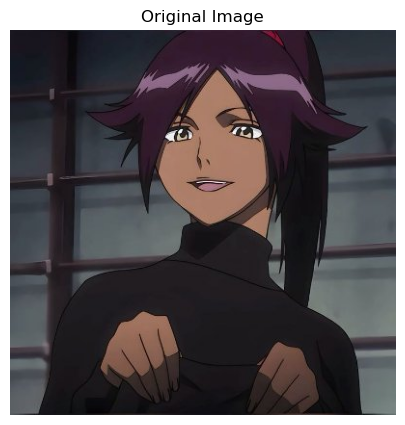

In [9]:
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()


In [10]:
height, width, channels = image.shape
print(f"Image Dimensions: Width={width}, Height={height}, Channels={channels}")



Image Dimensions: Width=400, Height=400, Channels=3


In [11]:
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

Total Pixels: 160000


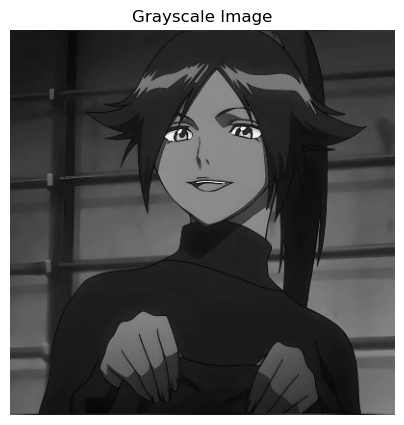

In [12]:
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5, 5))
plt.imshow(grayscale, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [32]:
grayscale_path = 'gray.jpg'
cv2.imwrite(grayscale_path, grayscale)
print(f"Grayscale Image saved at {grayscale_path}")

Grayscale Image saved at gray.jpg


In [14]:
_, binary = cv2.threshold(grayscale, 128, 255, cv2.THRESH_BINARY)

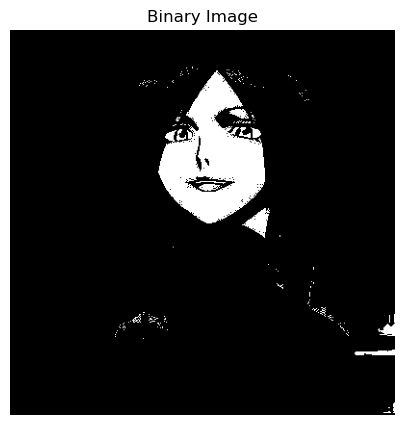

In [15]:
plt.figure(figsize=(5, 5))
plt.imshow(binary, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

In [16]:
black_pixels = np.sum(binary == 0)
print(f"Black Pixels Area: {black_pixels}")

Black Pixels Area: 149254


Gray Image Shape: (400, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


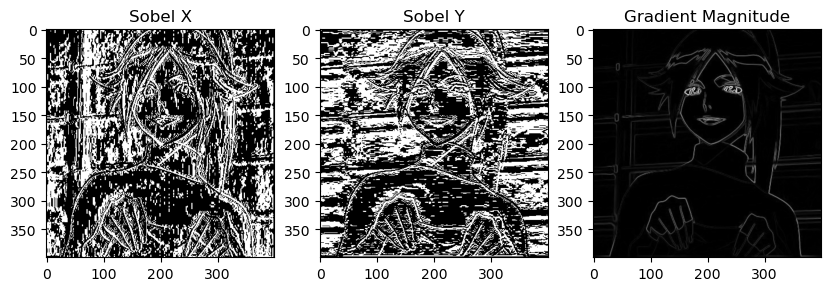

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
gray_img = cv2.imread('gray.jpg')  # Replace with your image path

   

    # Verify the grayscale image
print("Gray Image Shape:", gray_img.shape)

    # Apply Sobel operators
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges

    # Compute the gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(sobel_magnitude / sobel_magnitude.max() * 255)

    # Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')

plt.subplot(1, 3, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.show()


IndentationError: unexpected indent (921226467.py, line 4)

In [40]:
sobel_x = cv2.Sobel(grayscale, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(grayscale, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)
kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.filter2D(grayscale, -1, kernel_prewitt_x)
prewitt_y = cv2.filter2D(grayscale, -1, kernel_prewitt_y)
prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2).astype(np.uint8)

# Roberts Cross Operator
kernel_roberts_x = np.array([[1, 0], [0, -1]])
kernel_roberts_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(grayscale, -1, kernel_roberts_x)
roberts_y = cv2.filter2D(grayscale, -1, kernel_roberts_y)
roberts = np.sqrt(roberts_x**2 + roberts_y**2).astype(np.uint8)

# Canny Edge Detector
canny = cv2.Canny(grayscale, 100, 200)


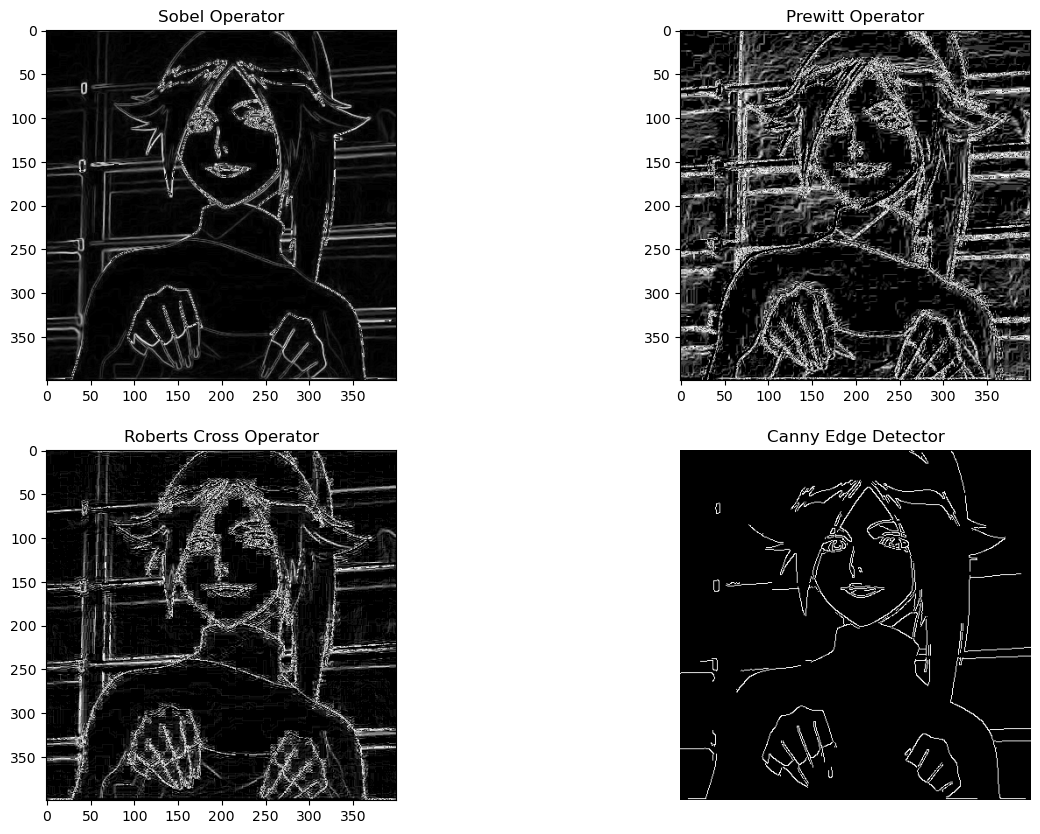

In [42]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1), plt.imshow(sobel, cmap='gray'), plt.title("Sobel Operator")
plt.subplot(2, 2, 2), plt.imshow(prewitt, cmap='gray'), plt.title("Prewitt Operator")
plt.subplot(2, 2, 3), plt.imshow(roberts, cmap='gray'), plt.title("Roberts Cross Operator")
plt.subplot(2, 2, 4), plt.imshow(canny, cmap='gray'), plt.title("Canny Edge Detector")
plt.axis('off')
plt.show()

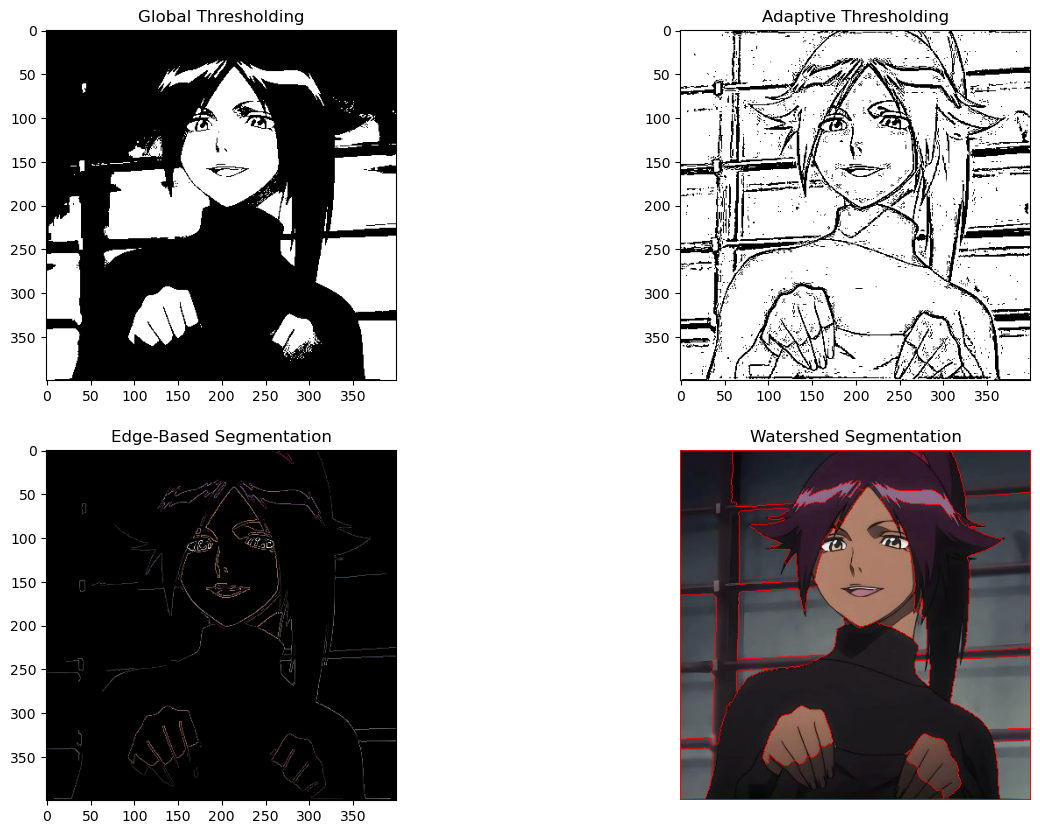

In [45]:
plt.figure(figsize=(15, 10))

# 1. Global Thresholding (Otsu's Method)
_, global_thresh = cv2.threshold(grayscale, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 2. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(grayscale, 255, 
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)

# 3. Edge-Based Segmentation (using Canny)
edges = cv2.Canny(grayscale, 100, 200)
edge_segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=edges)

# 4. Watershed Algorithm
# Create markers
ret, thresh = cv2.threshold(grayscale, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
watershed_segmented = image.copy()
watershed_segmented[markers == -1] = [0,0,255]

# Display segmentation results
plt.subplot(2, 2, 1), plt.imshow(global_thresh, cmap='gray'), plt.title("Global Thresholding")
plt.subplot(2, 2, 2), plt.imshow(adaptive_thresh, cmap='gray'), plt.title("Adaptive Thresholding")
plt.subplot(2, 2, 3), plt.imshow(edge_segmented), plt.title("Edge-Based Segmentation")
plt.subplot(2, 2, 4), plt.imshow(cv2.cvtColor(watershed_segmented, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis('off')
plt.show()